In [1]:
import os

import torch
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

from tsalib import dim_vars
from tsalib import permute_transform as get_permutation

In [2]:
# creating dimension variables to be used in type hints
B, W, H, C = dim_vars("Batch(B) Width(W) Height(H) Channels(C)", exists_ok=True)

# creating config object
config = type('', (), {})()

# adding image_dir to config object
config.image_dir = os.path.abspath("../images")
config.image_size = 512

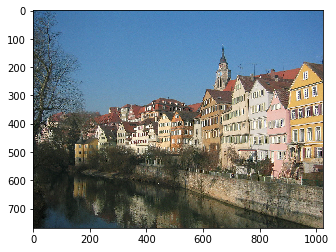

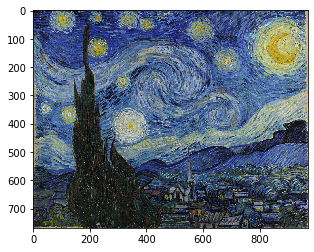

In [3]:
# loading images
content_image: Image.Image = Image.open(os.path.join(config.image_dir, "content.jpg"))
style_image: Image.Image = Image.open(os.path.join(config.image_dir, "style.jpg"))

for img in [content_image, style_image]:
    plt.imshow(img)
    plt.show()

In [4]:
# defining transforms

# preprocessing transform
preprocess = transforms.Compose([
    transforms.Resize(config.image_size),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.40760392, 0.45795686, 0.48501961],  # subtracting the mean of imagenet, which VGG net is trained on
        std=[1, 1, 1]
    )
])

# postprocessing transform
postprocess = transforms.Compose([
    transforms.Normalize(
        mean=[-0.40760392, -0.45795686, -0.48501961],  # adding back the mean subtracted before
        std=[1, 1, 1]
    ),
    transforms.Lambda(lambda x: torch.clamp(x, min=0, max=1)),
    transforms.ToPILImage()
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
shape: torch.Size([3, 512, 682])
max: 0.5845529437065125
min: -0.4614902138710022


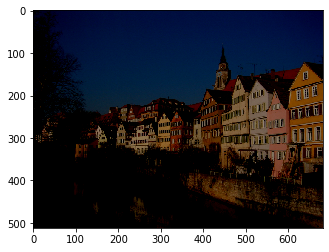

In [6]:
processed_content: (C, H, W) = preprocess(content_image)
plt.imshow(processed_content.permute(get_permutation('C, H, W -> H, W, C')))
print(f"shape: {processed_content.shape}")
print(f"max: {processed_content.max()}")
print(f"min: {processed_content.min()}")

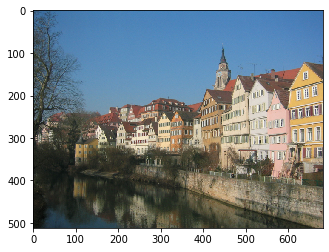

In [7]:
postprocessed_content: (C, H, W) = postprocess(processed_content)
plt.imshow(postprocessed_content)